In [82]:
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn
import joblib

%matplotlib inline
plt.style.use("fivethirtyeight")

In [83]:
class Perceptron:
    def __init__(self, eta:float=None, epochs:int=None):
        self.weights= np.random.rand(3)*1e-4 # small random weights
        training= (eta is not None) and (epochs is not None)
        if training:
            print(f"initaial weights before training: \n{self.weights}")
        self.eta=eta
        self.epochs=epochs
        
    def _z_outcome(self, inputs,weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self,X,y):
        self.X=X
        self.y=y
        
        X_with_bias=np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epochs>> {epoch}")
            print("--"*10)
            
            z=self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n {y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights= self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"update weights after epoch:{epoch}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    
    def predict(self,X_test):
        X_with_bias=np.c_[X_test, -np.ones((len(X_test), 1))]
        z=self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntoatl loss:{total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path=self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path=self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)
    

In [84]:
AND ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
}
df_and = pd.DataFrame(AND)

In [85]:
df_and

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [86]:
def prepare_data(df, target_col="y"):
    X=df.drop(target_col,axis=1)
    y=df[target_col]
    return X,y

In [87]:
X,y = prepare_data(df_and)

ETA=0.1 
n = 10

model_and = Perceptron(eta=ETA, epochs=n)
model_and.fit(X,y)

_ = model_and.total_loss()

initaial weights before training: 
[5.75782866e-05 4.10158666e-05 8.94631451e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs>> 0
--------------------
predicted value after forward pass: 
 [0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
update weights after epoch:0/10: 
[5.75782866e-05 4.10158666e-05 8.94631451e-05]
####################
--------------------
for epochs>> 1
--------------------
predicted value after forward pass: 
 [0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
update weights after epoch:1/10: 
[5.75782866e-05 4.10158666e-05 8.94631451e-05]
####################
--------------------
for epochs>> 2
--------------------
predicted value after forward pass: 
 [0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
update weights after epoch:2/10: 
[5.75782866e-05 4.10158666e-05 8.94631451e-05]
####################
--------------------
for epochs>> 3
------------

In [88]:
model_and.save(filename="and.model")

In [89]:
reload_model_and = Perceptron().load(filepath="model/and.model")

In [90]:
reload_model_and.predict(X_test=[[0,1]])

array([0])

In [91]:
OR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,1]
}
df_or = pd.DataFrame(OR)

In [92]:
X,y = prepare_data(df_or)

ETA=0.1 
n = 10

model_or = Perceptron(eta=ETA, epochs=n)
model_or.fit(X,y)

_ = model_or.total_loss()

initaial weights before training: 
[6.60952105e-05 3.12449568e-05 4.72210822e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs>> 0
--------------------
predicted value after forward pass: 
 [0 0 1 1]
error: 
0    0
1    1
2    0
3    0
Name: y, dtype: int64
update weights after epoch:0/10: 
[ 6.60952105e-05  1.00031245e-01 -9.99527789e-02]
####################
--------------------
for epochs>> 1
--------------------
predicted value after forward pass: 
 [1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
update weights after epoch:1/10: 
[6.60952105e-05 1.00031245e-01 4.72210822e-05]
####################
--------------------
for epochs>> 2
--------------------
predicted value after forward pass: 
 [0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
update weights after epoch:2/10: 
[6.60952105e-05 1.00031245e-01 4.72210822e-05]
####################
--------------------
for epochs>> 3
---------

In [93]:
XOR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,0]
}
df_xor = pd.DataFrame(XOR)

In [94]:
X,y = prepare_data(df_xor)

ETA=0.1 
n = 10

model_xor = Perceptron(eta=ETA, epochs=n)
model_xor.fit(X,y)

_ = model_xor.total_loss()

initaial weights before training: 
[1.27242237e-05 6.00082678e-05 9.04547178e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs>> 0
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
update weights after epoch:0/10: 
[ 0.10001272  0.10006001 -0.19990955]
####################
--------------------
for epochs>> 1
--------------------
predicted value after forward pass: 
 [1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
update weights after epoch:1/10: 
[1.27242237e-05 6.00082678e-05 9.04547178e-05]
####################
--------------------
for epochs>> 2
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
update weights after epoch:2/10: 
[ 0.10001272  0.10006001 -0.19990955]
####################
--------------------
for epochs>> 3
--------------------
predicted

In [95]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

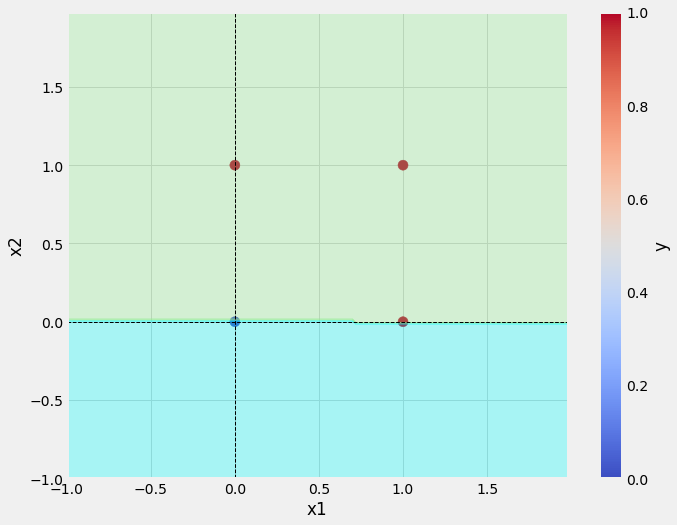

In [97]:
save_plot(df_or, model_or,filename="or.png")

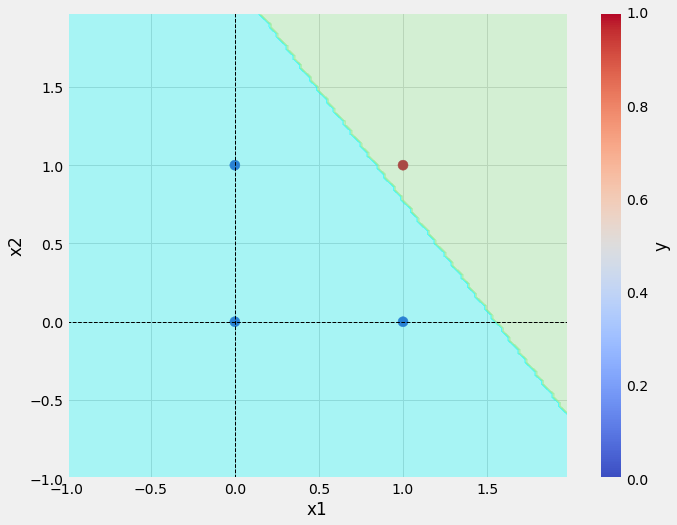

In [98]:
save_plot(df_and, model_and,filename="and.png")
